In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

C:\Users\elwal\AppData\Local\Temp\ipykernel_5816\353157648.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Cancer data

In [3]:
cancer_df = pd.read_csv("Cancer_data.csv")

### EDA

In [4]:
cancer_df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

most of the data looks like they're numbers that aren't easy to understand without being in the industry, so we're mainly concerned with "diagnosis" and its relation to the other parameters

In [6]:
cancer_df.shape


(569, 32)

In [7]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

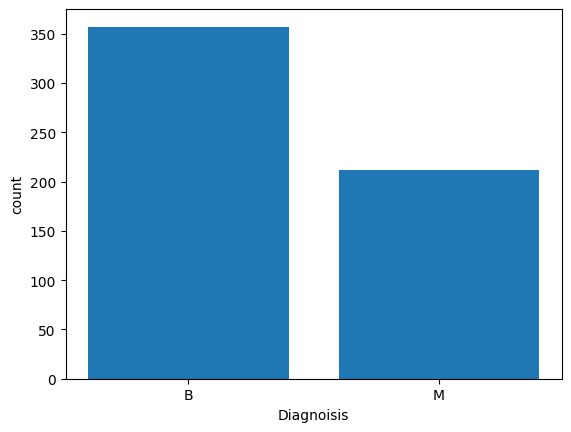

In [8]:
diagnosis = cancer_df['diagnosis'].value_counts()
plt.bar(diagnosis.index,diagnosis)
plt.xlabel('Diagnoisis')
plt.ylabel('count')
plt.show()

# Dsiplay the plot
plt.show()

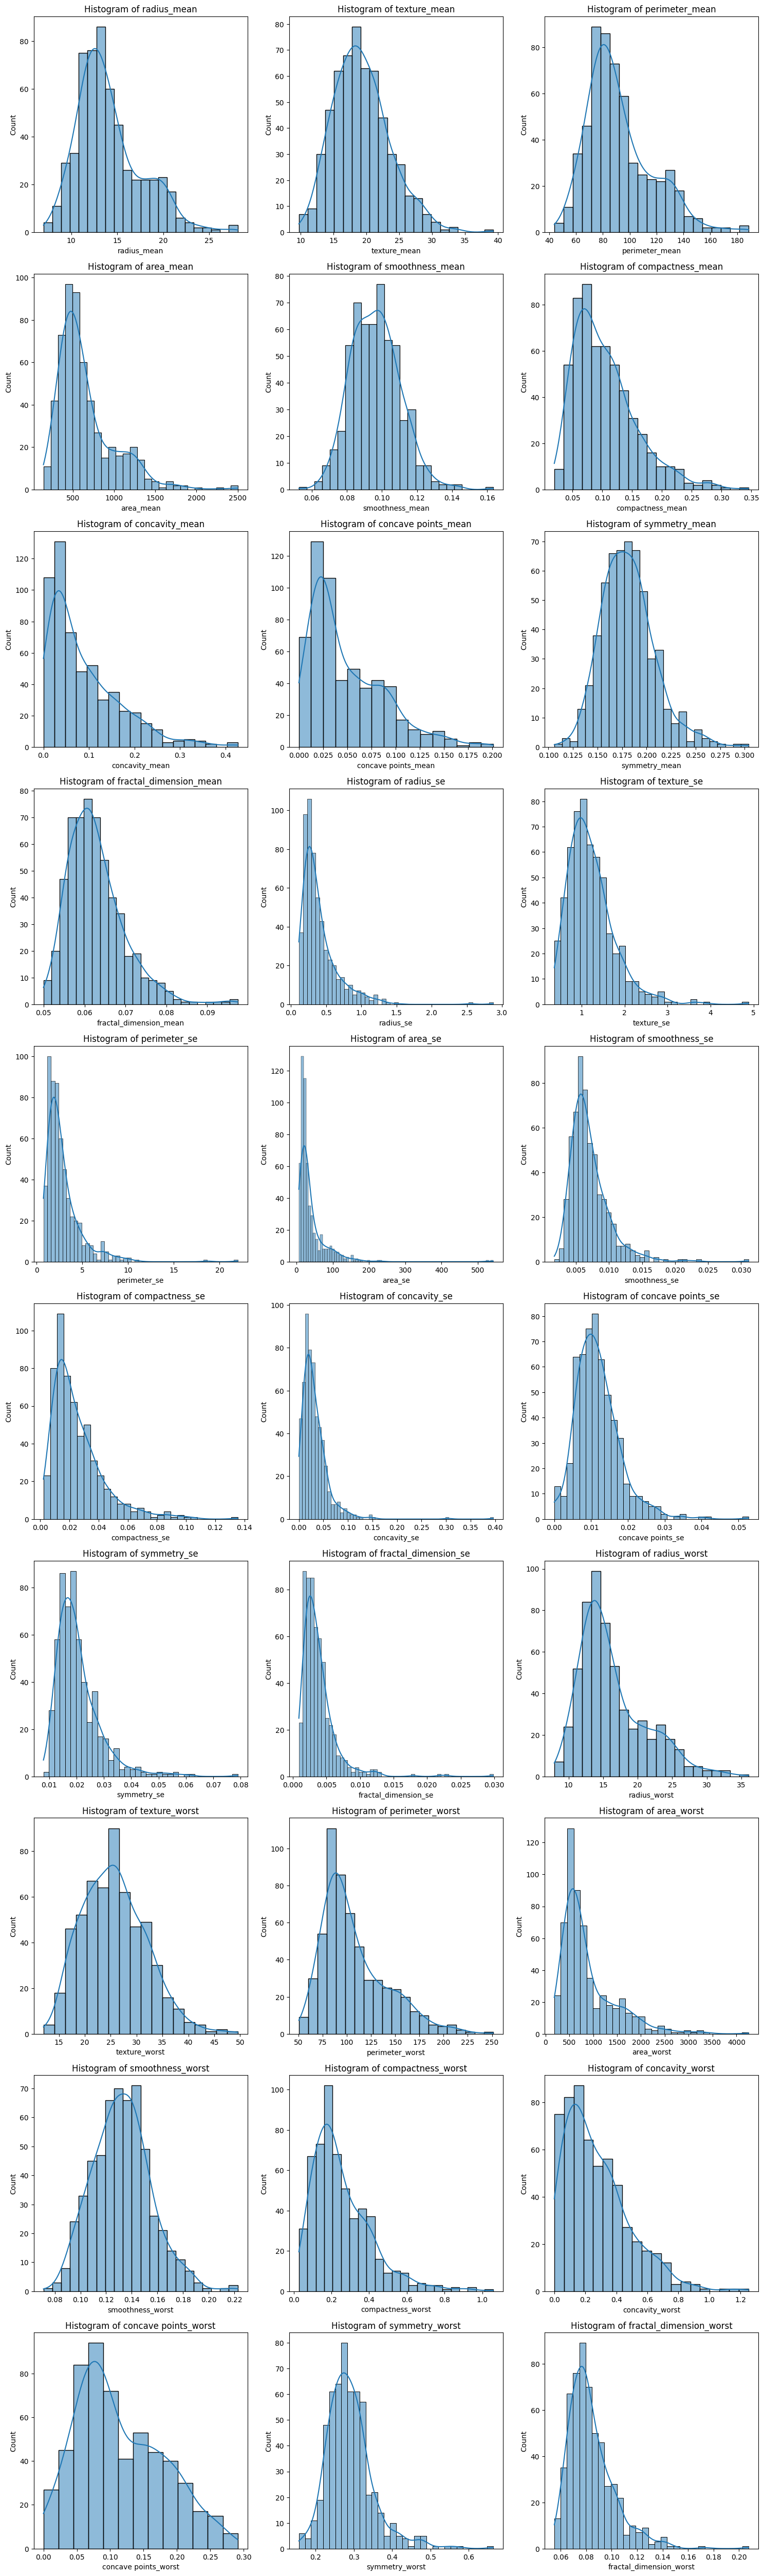

In [9]:
cancer_mod = cancer_df.drop(['id','diagnosis'],axis=1)
num_plots = len(cancer_mod.columns)

fig, axes = plt.subplots(num_plots, 3, figsize=(15, num_plots * 5)) #making a grid of plots so we dont execute the same code multiple times

axes = axes.flatten()

for i, col in enumerate(cancer_mod.columns):
    sns.histplot(cancer_mod[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) #deletes all the empty graphs at the end

plt.tight_layout()
plt.show()

Plotting a scatter, normally we can do a heat map to correlate everything instead of feature by feature as I do for the next dataset but it was too crammed

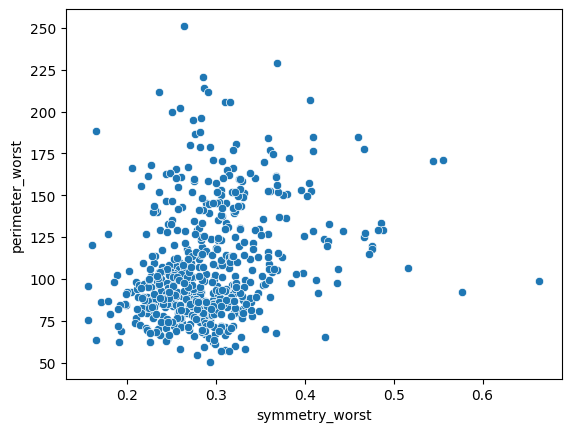

In [17]:
sns.scatterplot(data=cancer_mod, x='symmetry_worst', y='perimeter_worst')
plt.show()

### Data preprocessing

In [ ]:
cancer_df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
cancer_df.isnull().sum().reset_index()

,index,0
0,id,0
1,diagnosis,0
2,radius_mean,0
3,texture_mean,0
4,perimeter_mean,0
5,area_mean,0
6,smoothness_mean,0
7,compactness_mean,0
8,concavity_mean,0
9,concave points_mean,0


no nulls, but id doesnt help the model

In [ ]:
cancer_df = cancer_df.drop(columns='id',axis = 1)

In [ ]:
num_cols = cancer_df.select_dtypes(include=['int64', 'float64', 'int32']).columns
print(num_cols)

minmax = MinMaxScaler()
cancer_df[num_cols] = minmax.fit_transform(cancer_df[num_cols])
cancer_df.head()

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


# Insurance data

In [ ]:
insurance_df = pd.read_csv("insurance.csv")

### EDA

In [ ]:
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
insurance_df.shape


(1338, 7)

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


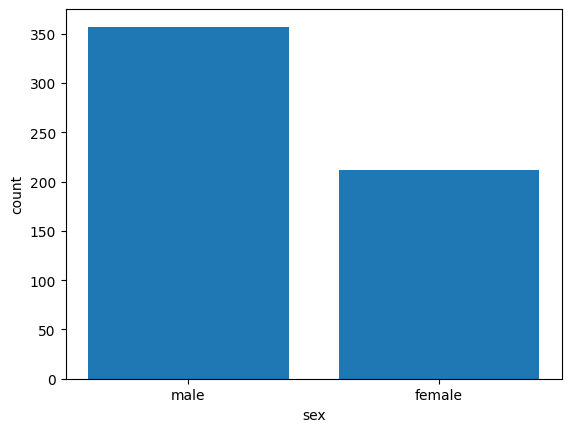

In [ ]:
sex = insurance_df['sex'].value_counts()
plt.bar(sex.index,diagnosis)
plt.xlabel('sex')
plt.ylabel('count')
plt.show()

# Dsiplay the plot
plt.show()

heatmaps is unclear so instead to corelate

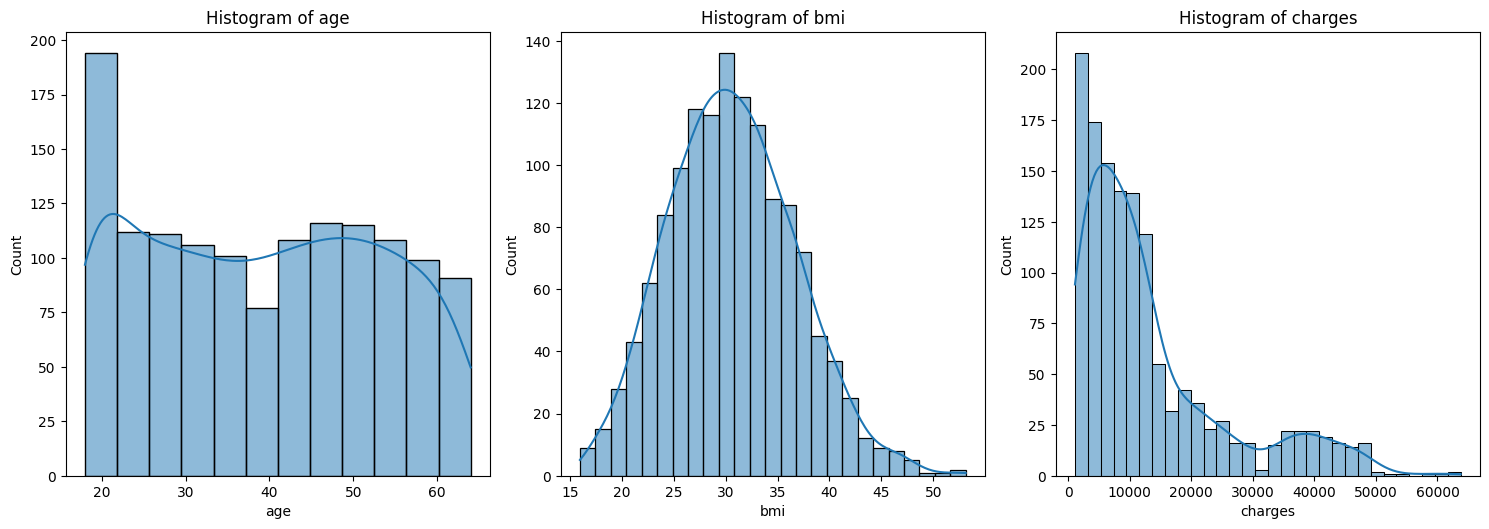

In [ ]:
ins_mod = cancer_df.select_dtypes(include=['int64', 'float64', 'int32'])

num_plots = len(cancer_mod.columns)

fig, axes = plt.subplots(num_plots, 3, figsize=(15, num_plots * 5)) #making a grid of plots so we dont execute the same code multiple times

axes = axes.flatten()

for i, col in enumerate(cancer_mod.columns):
    sns.histplot(cancer_mod[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) #deletes all the empty graphs at the end

plt.tight_layout()
plt.show()

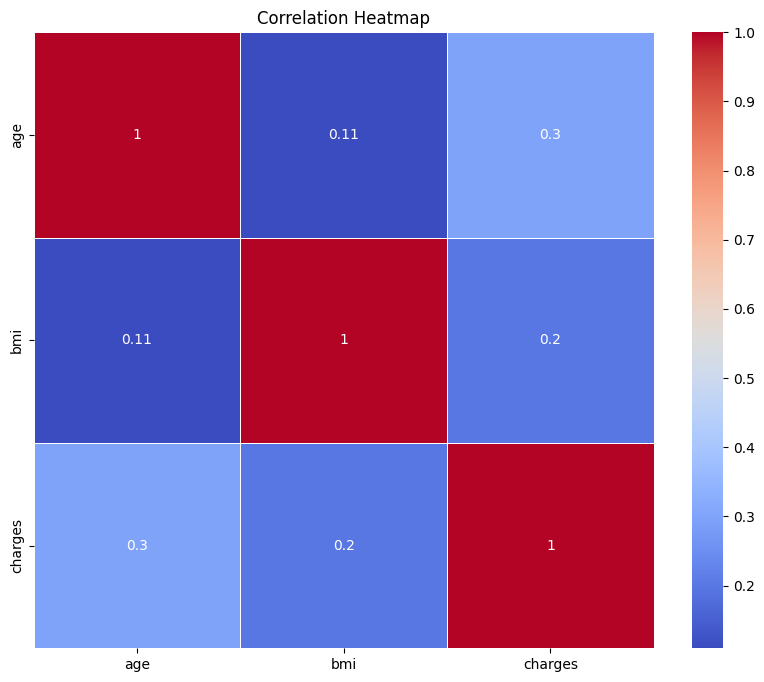

In [ ]:
corr = ins_mod.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'bmi')

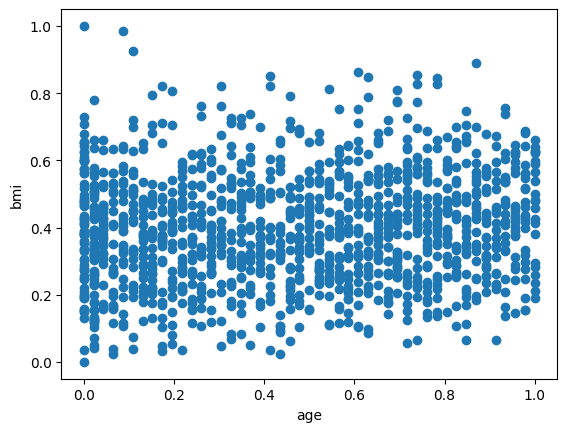

In [ ]:
plt.scatter(data = insurance_df, x = 'age', y = 'bmi')

plt.xlabel('age')
plt.ylabel('bmi')

the above doesnt seem as corelated as the heatmap showed

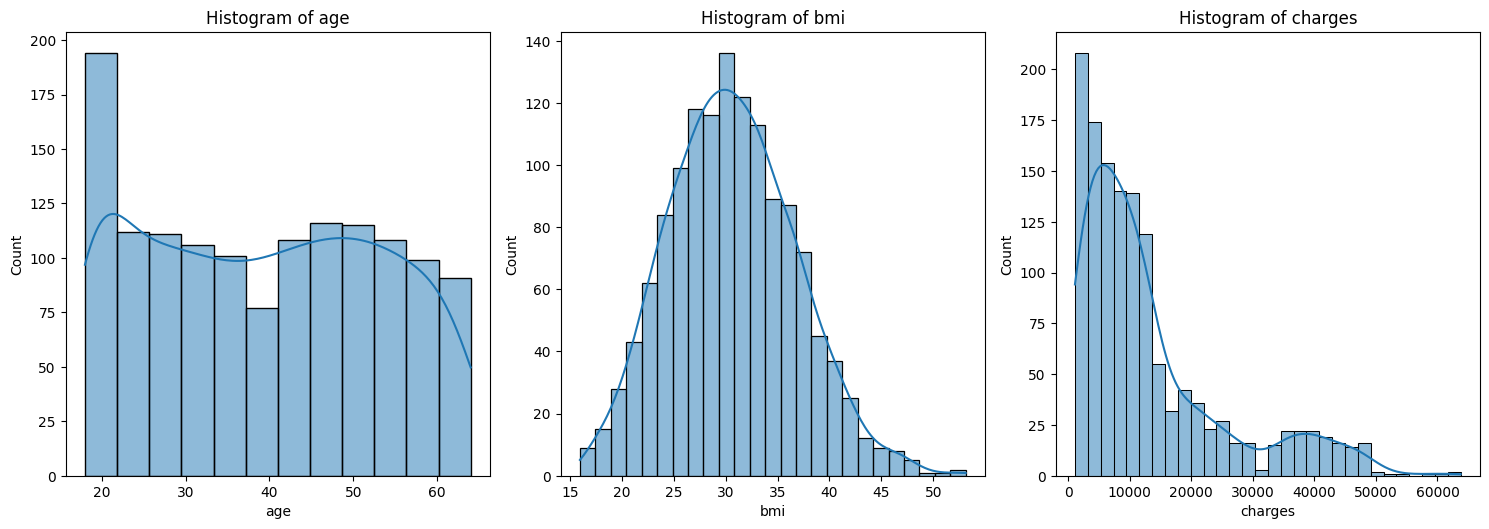

In [ ]:
num_plots = len(ins_mod.columns)

fig, axes = plt.subplots(num_plots, 3, figsize=(15, num_plots * 5)) #making a grid of plots so we dont execute the same code multiple times

axes = axes.flatten()

for i, col in enumerate(ins_mod.columns):
    sns.histplot(ins_mod[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) #deletes all the empty graphs at the end

plt.tight_layout()
plt.show()

<Axes: xlabel='sex', ylabel='region'>

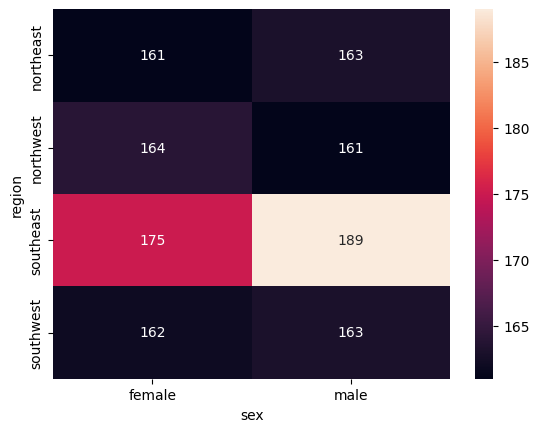

In [ ]:
sns.heatmap(pd.crosstab(insurance_df['region'], insurance_df['sex']), annot=True, fmt='d')

<Axes: xlabel='smoker', ylabel='charges'>

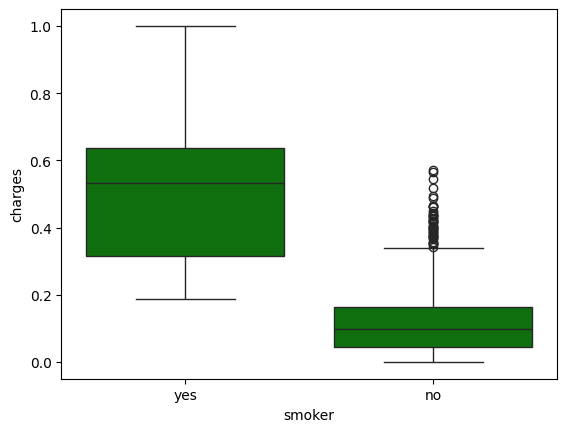

In [ ]:

sns.boxplot(data=insurance_df, x='smoker', y='charges', color='green')

<Axes: xlabel='smoker', ylabel='count'>

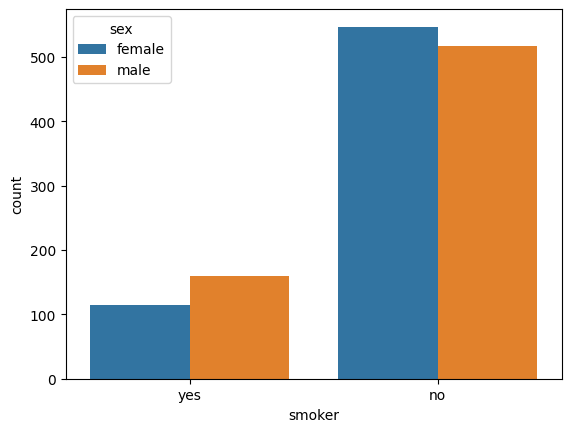

In [ ]:
sns.countplot(data = insurance_df, x = 'smoker', hue = 'sex')

### Data preprocessing

In [ ]:
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
insurance_df.isnull().sum().reset_index()

,index,0
0,age,0
1,sex,0
2,bmi,0
3,children,0
4,smoker,0
5,region,0
6,charges,0


no nulls

In [ ]:
num_cols = insurance_df.select_dtypes(include=['int64', 'float64', 'int32']).columns
print(num_cols)

minmax = MinMaxScaler()
insurance_df[num_cols] = minmax.fit_transform(insurance_df[num_cols])
insurance_df.head(20)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0.0,yes,southwest,0.251611
1,0.000000,male,0.479150,0.2,no,southeast,0.009636
2,0.217391,male,0.458434,0.6,no,southeast,0.053115
3,0.326087,male,0.181464,0.0,no,northwest,0.333010
4,0.304348,male,0.347592,0.0,no,northwest,0.043816
5,0.282609,female,0.263115,0.0,no,southeast,0.042056
6,0.608696,female,0.470272,0.2,no,southeast,0.113629
7,0.413043,female,0.316922,0.6,no,northwest,0.098320
8,0.413043,male,0.373150,0.4,no,northeast,0.084352
9,0.913043,female,0.265806,0.0,no,northwest,0.443765


### Student Scores

In [ ]:
students_df = pd.read_csv("student_scores.csv")

### EDA

In [ ]:
students_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
students_df.shape


(96, 2)

In [ ]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


Text(0, 0.5, 'Score')

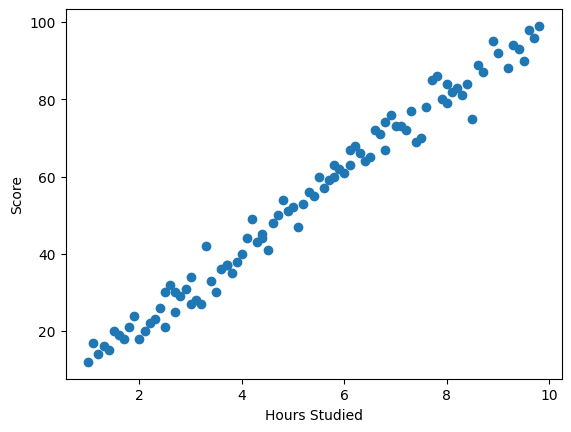

In [ ]:
plt.scatter(data = students_df, x = 'Hours', y = 'Scores')

plt.xlabel('Hours Studied')
plt.ylabel('Score')

### Data preprocessing

In [ ]:
students_df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
91,False,False
92,False,False
93,False,False
94,False,False


In [ ]:
students_df.isnull().sum().reset_index()

,index,0
0,Hours,0
1,Scores,0


no nulls

In [ ]:
num_cols = students_df.select_dtypes(include=['int64', 'float64', 'int32']).columns

minmax = MinMaxScaler()
students_df[num_cols] = minmax.fit_transform(students_df[num_cols])
students_df.head()

,Hours,Scores
0,0.170455,0.103448
1,0.465909,0.402299
2,0.250000,0.172414
3,0.852273,0.724138
4,0.284091,0.206897
